# ■ 기계가 직접 학습해서 가중치(W) 와 바이어스(b) 를 알아내도록 하는 방법

## 예제1. 아래의 두 행렬을 생성하시오  
                        
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
\begin{pmatrix} -1 & 0 & 0\\ -1 & 1&0\\-1&0&1\\-1&1&1 \end{pmatrix}

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
\begin{pmatrix} -0.3 & 0.4 & 0.1 \end{pmatrix}

In [1]:
import numpy as np

x = np.array([[-1,0,0], [-1,1,0], [-1,0,1], [-1,1,1]])
w = np.array([[0.3], [0.4], [0.1]])

print(x.shape)  # (4,3)
print(w.shape)  # (3,1)
print(x.ndim)  # 2 차원
print(w.ndim)  # 2 차원

(4, 3)
(3, 1)
2
2


## 예제2. 손으로 퍼셉트론을 구현해봅니다.

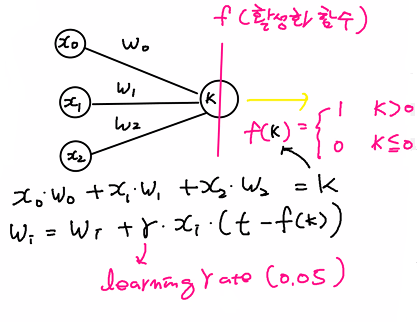


            x            target       w
     x0   x1  x2           
     -1    0   0           0         0.3
     -1    1   0           0         0.4
     -1    0   1           0         0.1
     -1    1   1           1


w0 = 0.3, w1 = 0.4, w2 = 0.1  

입력신호 1 (x1=0, x2=0)  

    k = x0*w0 + x1*w1 + x2*w2  
    = -1*0.3 + 0*0.4 + 0*0.1 = -0.3   
    f(-0.3) = 0  
    t - f(k) = 0 - 0 = 0   
    가중치 변동 없음  

입력신호 2 (x1=1, x2=0)

    k = x0*w0 + x1*w1 + x2*w2  
    = -1*0.3 + 1*0.4 + 0*0.1 = 0.1   
    f(0.1) = 1  
    t - f(k) = 0 - 1 = -1   

    wi = wi + r*xi*(t-f(k))  
    w0 = w0 + 0.05*(-1)*(-1)  
       = 0.3 + 0.05 = 0.35   
    w1 = w1 + 0.05*1*(-1)  
       = 0.4 - 0.05 = 0.35   
    w2 = w2 + 0.05*0*(-1)  
       = 0.1 + 0 = 0.1   

가중치 변동
    =>  w0 = 0.35, w1 = 0.35, w2 = 0.1

입력신호 3 (x1=0, x2=1)

    k = x0*w0 + x1*w1 + x2*w2
    = -1*0.35 + 0*0.35 + 1*0.1 = -0.25 
    f(-0.25) = 0
    t - f(k) = 0 - 0 = 0 
    가중치 변동 없음

입력신호 4 (x1=1, x2=1)

    k = x0*w0 + x1*w1 + x2*w2
    = -1*0.35 + 1*0.35 + 1*0.1 = 0.1 
    f(0.1) = 1
    t - f(k) = 1 - 1 = 0 
    가중치 변동 없음
----------------------------------------------------


w0 = 0.35, w1 = 0.35, w2 = 0.1

입력신호 1 (x1=0, x2=0)

    k = x0*w0 + x1*w1 + x2*w2
    = -1*0.35 + 0*0.35 + 0*0.1 = -0.35 
    f(-0.35) = 0
    t - f(k) = 0 - 0 = 0 
    가중치 변동 없음

입력신호 2 (x1=1, x2=0)

    k = x0*w0 + x1*w1 + x2*w2
    = -1*0.35 + 1*0.35 + 0*0.1 = 0 
    f(0) = 0
    t - f(k) = 0 - 0 = 0 
    가중치 변동 없음

입력신호 3 (x1=0, x2=1)

    k = x0*w0 + x1*w1 + x2*w2
    = -1*0.35 + 0*0.35 + 1*0.1 = -0.25 
    f(-0.25) = 0
    t - f(k) = 0 - 0 = 0 
    가중치 변동 없음

입력신호 4 (x1=1, x2=1)

    k = x0*w0 + x1*w1 + x2*w2
    = -1*0.35 + 1*0.35 + 1*0.1 = 0.1 
    f(0.1) = 1
    t - f(k) = 1 - 1 = 0 
    가중치 변동 없음


최종 가중치 :

    w0 = 0.35, w1 = 0.35, w2 = 0.1


## 문제27. AND 게이트 함수로 위에서 구한 가중치와 바이어스를 대입해서 TARGET(정답) 을 잘 예측하는지 테스트하시오 !

In [2]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.35, 0.1])   # w1 = 0.35, w2 = 0.1
    b = -0.35                   # x0*w0 = (-1)*0.35 = -0.35 
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


# ■ AND 게이트 데이터는 어떻게 분류가 되는 것인가 ?

    x0*w0 + x1*w1 + x2*w2 = k
    -0.35 + 0.35*x1 + 0.1*x2 = 0
    0.1*x2 = -0.35*x1 + 0.35     
          ↓   양변에 * 100
    10*x2 = -35*x1 + 35
          ↓ 양변에 / 5
    2*x2 = -7*x1 + 7
    x2 = -7/2*x1 + 7/2
    x2 = -3.5*x1 + 3.5

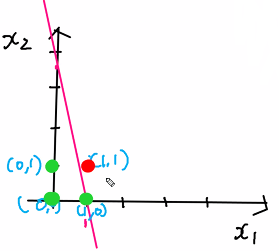



** k 가 0 인 이유 ?

    f(k) =  1 (k > 0)
            0 (k <= 0)
k=0 을 기준으로 나눠지기 때문에 k= 0 으로 두고 계산

## 예제1. 아래의 두 행렬로 다음 계산식을 완성하시오 ! (브로드 캐스트)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
\begin{pmatrix} -1 & 0 & 0\\ -1 & 1&0\\-1&0&1\\-1&1&1 \end{pmatrix}

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
\begin{pmatrix} 0.3 & 0.4 & 0.1\end{pmatrix}



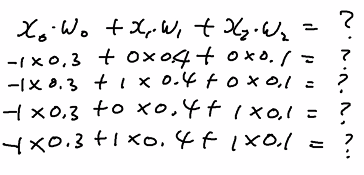

In [6]:
import numpy as np

x = np.array([[-1,0,0], [-1,1,0], [-1,0,1], [-1,1,1]])  # 4x3 행렬
w = np.array([[0.3], [0.4], [0.1]])                      # 3x1 행렬
target = np.array([[0], [0], [0], [1]])
print(w.T)          # 행렬 전치 : 행렬.T
print('\n')
print(w.T.shape)    # (1,3) : 1x3 행렬
print('\n')
print(x * w.T)
print('\n')

for i in range(len(x)):
    print( np.sum( x[i] * w.T ) )

[[0.3 0.4 0.1]]


(1, 3)


[[-0.3  0.   0. ]
 [-0.3  0.4  0. ]
 [-0.3  0.   0.1]
 [-0.3  0.4  0.1]]


-0.3
0.10000000000000003
-0.19999999999999998
0.20000000000000004


## 예제2. 입력값과 가중치의 곱의 합을 계산하는 predict 함수를 만드시오

In [7]:
def predict(x, w):
    a = np.sum(x*w.T)
    return a

for i in range(len(x)):
    print( predict(x[i], w) )

-0.3
0.10000000000000003
-0.19999999999999998
0.20000000000000004


## 예제3. 입력되는 값이 0 보다 작거나 같으면 0 을 출력하고 입력되는 값이 0 보다 크면 1 을 출력하는 step_func 함수를 생성하시오 !

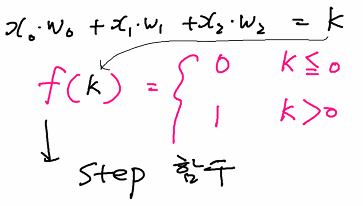

In [18]:
def step_func(k):
    if k <= 0:
        return 0
    else:
        return 1

print( step_func(0.3) )  # 1
print( step_func(-2) )   # 0

1
0


## 예제4. 위에서 출력한 k 값을 방금 만든 step_func 함수에 넣고 값을 출력하시오

In [16]:
import numpy as np

x = np.array([[-1,0,0], [-1,1,0], [-1,0,1], [-1,1,1]])   # 4x3 행렬
w = np.array([[0.3], [0.4], [0.1]])                      # 3x1 행렬

def step_func(k):
    if k <= 0:
        return 0
    else:
        return 1

def predict(x, w):
    a = np.sum(x*w.T)
    return step_func(a)

for i in range(len(x)):
    print( predict(x[i], w) )

0
1
0
1


## 예제5. 위에서 만든 예측값과 target 값과의 차이를 구하시오 !

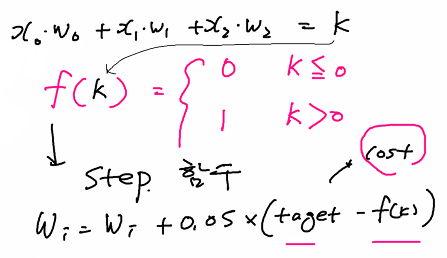

In [17]:
import numpy as np

x = np.array([[-1,0,0], [-1,1,0], [-1,0,1], [-1,1,1]])   # 4x3 행렬
w = np.array([[0.3], [0.4], [0.1]])                      # 3x1 행렬
target = np.array([[0], [0], [0], [1]])

def step_func(k):
    if k <= 0:
        return 0
    else:
        return 1

def predict(x, w):
    a = np.sum(x*w.T)
    return step_func(a)

for i in range(len(x)):
    cost = target[i] - predict(x[i], w)
    print(cost)

[0]
[-1]
[0]
[0]


## 예제6. 위의 cost 가 0 이 아니면 cost 를 출력하시오

In [18]:
import numpy as np

x = np.array([[-1,0,0], [-1,1,0], [-1,0,1], [-1,1,1]])   # 4x3 행렬
w = np.array([[0.3], [0.4], [0.1]])                      # 3x1 행렬
target = np.array([[0], [0], [0], [1]])

def step_func(k):
    if k <= 0:
        return 0
    else:
        return 1

def predict(x, w):
    a = np.sum(x*w.T)
    return step_func(a)

for i in range(len(x)):
    cost = target[i] - predict(x[i], w)
    if cost != 0:
        print(cost)

[-1]


## 예제7. cost 가 0 이 아닐때는 가중치가 갱신될 수 있게 하시오

In [20]:
import numpy as np

x = np.array([[-1,0,0], [-1,1,0], [-1,0,1], [-1,1,1]])   # 4x3 행렬
w = np.array([[0.3], [0.4], [0.1]])                      # 3x1 행렬
target = np.array([[0], [0], [0], [1]])

def step_func(k):
    if k <= 0:
        return 0
    else:
        return 1

def predict(x, w):
    a = np.sum(x*w.T)
    return step_func(a)

for i in range(len(x)):
    cost = target[i] - predict(x[i], w)
    if cost != 0:
        w = w + np.array([0.05 * x[i] * cost]).T
    print(w)

[[0.3]
 [0.4]
 [0.1]]
[[0.35]
 [0.35]
 [0.1 ]]
[[0.35]
 [0.35]
 [0.1 ]]
[[0.35]
 [0.35]
 [0.1 ]]


## 문제28. 위의 코드를 수정해서 맨 마지막에 갱신된 w 값만 출력되게하시오 !

In [21]:
import numpy as np

x = np.array([[-1,0,0], [-1,1,0], [-1,0,1], [-1,1,1]])   # 4x3 행렬
w = np.array([[0.3], [0.4], [0.1]])                      # 3x1 행렬
target = np.array([[0], [0], [0], [1]])

for i in range(len(x)):
    cost = target[i] - predict(x[i], w)
    if cost != 0:
        w = w + np.array([0.05 * x[i] * cost]).T
print(w)

[[0.35]
 [0.35]
 [0.1 ]]


## 문제29. 비용이 0이 되고 더 이상 비용이 발생하지 않았을때의 가중치가 출력되게 하시오

In [24]:
import numpy  as  np

x = np.array( [ [ -1, 0, 0 ], [ -1, 1, 0 ], [ -1, 0, 1 ], [-1, 1, 1 ] ] )  # 4x3 
w = np.array([ [0.3], [0.4], [0.1] ] )  
target = np.array( [ [0], [0], [0], [1] ] )

def  step_function(x):
    if  x > 0:                                                    
        return  1                                                  
    else:                                                             
        return  0                                                 

def predict(x, w):
    a = np.sum( x*w.T)
    return  step_function(a)

for j in  range(5):
    sum1 = 0    # sum1 에는 4개의 데이터를 입력할 때 발생하는 비용(에러)가 입력될 변수
    for i in range( len(x) ):   # AND 게이트 4개의 입력데이터를 사용하는 루프문
        cost = target[i] - predict(x[i], w)    # 비용을 계산하는 코드
        if cost != 0:   # 비용이 0이 아니면
            w = w + np.array( [ 0.05 * x[i] * cost ] ).T   # 가중치를 갱신해라
        elif cost == 0:      # 비용이 0이면
            continue          # 계속 그 다음으로 넘어가서 진행해라
        sum1 += cost   # sum1 에 4개의 입력데이터를 사용했을때 발생하는 비용을 입력한다.
    print(sum1, w.T)   # 보기 편하게 하려고 w 를 전치시킴

[-1] [[0.35 0.35 0.1 ]]
[-1] [[0.4 0.3 0.1]]
0 [[0.4 0.3 0.1]]
0 [[0.4 0.3 0.1]]
0 [[0.4 0.3 0.1]]


## 문제30. 위의 코드에서 비용(cost) 가 0이 되는 시점에 break 해서 loop 문을 종료하고 변경된 최종 가중치가 출력되게하시오

In [25]:
import numpy  as  np

x = np.array( [ [ -1, 0, 0 ], [ -1, 1, 0 ], [ -1, 0, 1 ], [-1, 1, 1 ] ] )  # 4x3 
w = np.array([ [0.3], [0.4], [0.1] ] )  
target = np.array( [ [0], [0], [0], [1] ] )

def  step_function(x):
    if  x > 0:                                                    
        return  1                                                  
    else:                                                             
        return  0                                                 

def predict(x, w):
    a = np.sum( x*w.T)
    return  step_function(a)

for j in  range(5):
    sum1 = 0    # sum1 에는 4개의 데이터를 입력할 때 발생하는 비용(에러)가 입력될 변수
    for  i  in   range( len(x) ):   # AND 게이트 4개의 입력데이터를 사용하는 루프문
        cost = target[i] - predict(x[i], w)    # 비용을 계산하는 코드
        if  cost  != 0:   # 비용이 0이 아니면
            w = w + np.array( [ 0.05 * x[i] * cost ] ).T   # 가중치를 갱신해라
        elif  cost == 0:      # 비용이 0이면
            continue          # 계속 그 다음으로 넘어가서 진행해라
        sum1 += cost   # sum1 에 4개의 입력데이터를 사용했을때 발생하는 비용을 입력한다.
    if sum1 == 0:
        break
print(sum1, w.T)   # 보기 편하게 하려고 w 를 전치시킴

0 [[0.4 0.3 0.1]]


## 문제31. 위의 코드에 for j in range(5) 를 무한루프문으로 변경하시오 !

In [28]:
import numpy  as  np

x = np.array( [ [ -1, 0, 0 ], [ -1, 1, 0 ], [ -1, 0, 1 ], [-1, 1, 1 ] ] )  # 4x3 
w = np.array([ [0.3], [0.4], [0.1] ] )  
target = np.array( [ [0], [0], [0], [1] ] )

def  step_function(x):
    if  x > 0:                                                    
        return  1                                                  
    else:                                                             
        return  0                                                 

def predict(x, w):
    a = np.sum( x*w.T)
    return  step_function(a)

while True:
    sum1 = 0    # sum1 에는 4개의 데이터를 입력할 때 발생하는 비용(에러)가 입력될 변수
    for  i  in   range( len(x) ):   # AND 게이트 4개의 입력데이터를 사용하는 루프문
        cost = target[i] - predict(x[i], w)    # 비용을 계산하는 코드
        if  cost  != 0:   # 비용이 0이 아니면
            w = w + np.array( [ 0.05 * x[i] * cost ] ).T   # 가중치를 갱신해라
        elif  cost == 0:      # 비용이 0이면
            continue          # 계속 그 다음으로 넘어가서 진행해라
        sum1 += cost   # sum1 에 4개의 입력데이터를 사용했을때 발생하는 비용을 입력한다.
    if sum1 == 0:
        break
print(sum1, w.T)   # 보기 편하게 하려고 w 를 전치시킴

0 [[0.4 0.3 0.1]]


## 문제32. 위의 코드를 아래와 같이 수행되면 실행되도록 함수로 생성하시오 ! (함수이름 : perceptron_1957)

    x = np.array( [ [ -1, 0, 0 ], [ -1, 1, 0 ], [ -1, 0, 1 ], [-1, 1, 1 ] ] )  # 4x3 
    w = np.array([ [0.3], [0.4], [0.1] ] )  
    target = np.array( [ [0], [0], [0], [1] ] )

    perceptron_1957(x, w, target) 

    최종 가중치: [[0.4 0.3 0.1]]


In [30]:
import numpy  as  np

x = np.array( [ [ -1, 0, 0 ], [ -1, 1, 0 ], [ -1, 0, 1 ], [-1, 1, 1 ] ] )  # 4x3 
w = np.array([ [0.3], [0.4], [0.1] ] )  
target = np.array( [ [0], [0], [0], [1] ] )

def  step_function(x):
    if  x > 0:                                                    
        return  1                                                  
    else:                                                             
        return  0                                                 

def predict(x, w):
    a = np.sum( x*w.T)
    return  step_function(a)

def perceptron_1957(x, w, target):
    while True:
        sum1 = 0    # sum1 에는 4개의 데이터를 입력할 때 발생하는 비용(에러)가 입력될 변수
        for  i  in   range( len(x) ):   # AND 게이트 4개의 입력데이터를 사용하는 루프문
            cost = target[i] - predict(x[i], w)    # 비용을 계산하는 코드
            if  cost  != 0:   # 비용이 0이 아니면
                w = w + np.array( [ 0.05 * x[i] * cost ] ).T   # 가중치를 갱신해라
            elif  cost == 0:      # 비용이 0이면
                continue          # 계속 그 다음으로 넘어가서 진행해라
            sum1 += cost   # sum1 에 4개의 입력데이터를 사용했을때 발생하는 비용을 입력한다.
        if sum1 == 0:
            break 
    print('최종 가중치:', w.T)    # 보기 편하게 하려고 w 를 전치시킴

perceptron_1957(x, w, target)

최종 가중치: [[0.4 0.3 0.1]]


## 문제33. 위의 perceptron_1957 함수에 OR 게이트 데이터와 라벨을 입력하고 가중치를 출력하시오

In [32]:
import numpy  as  np

x = np.array( [ [ -1, 0, 0 ], [ -1, 1, 0 ], [ -1, 0, 1 ], [-1, 1, 1 ] ] )  # 4x3 
w = np.array([ [0.3], [0.4], [0.1] ] )  
target = np.array( [ [0], [1], [1], [1] ] )

def  step_function(x):
    if  x > 0:                                                    
        return  1                                                  
    else:                                                             
        return  0                                                 

def predict(x, w):
    a = np.sum( x*w.T)
    return  step_function(a)

def perceptron_1957(x, w, target):
    while True:
        sum1 = 0    # sum1 에는 4개의 데이터를 입력할 때 발생하는 비용(에러)가 입력될 변수
        for  i  in   range( len(x) ):   # OR 게이트 4개의 입력데이터를 사용하는 루프문
            cost = target[i] - predict(x[i], w)    # 비용을 계산하는 코드
            if  cost  != 0:   # 비용이 0이 아니면
                w = w + np.array( [ 0.05 * x[i] * cost ] ).T   # 가중치를 갱신해라
            elif  cost == 0:      # 비용이 0이면
                continue          # 계속 그 다음으로 넘어가서 진행해라
            sum1 += cost   # sum1 에 4개의 입력데이터를 사용했을때 발생하는 비용을 입력한다.
        if sum1 == 0:
            break 
    print('최종 가중치:', w.T)    # 보기 편하게 하려고 w 를 전치시킴

perceptron_1957(x, w, target)

최종 가중치: [[0.15 0.4  0.25]]
